## A Quant Experiment Using AAPL As An Example

### First install yfinance for data acquisition

In [1]:
!pip3 install yfinance

/bin/bash: /home/yuanyuan/anaconda3/envs/mymtce/lib/libtinfo.so.6: no version information available (required by /bin/bash)
  Obtaining dependency information for requests>=2.31 from https://files.pythonhosted.org/packages/70/8e/0e2d847013cb52cd35b38c009bb167a1a26b2ce6cd6965bf26b47bc0bf44/requests-2.31.0-py3-none-any.whl.metadata
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
Using cached requests-2.31.0-py3-none-any.whl (62 kB)
DEPRECATION: pytorch-lightning 1.7.4 has a non-standard dependency specifier torch>=1.9.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
ER

### import the necessary libraries

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

### Download and quick check the stock price history

In [3]:
data = yf.download("AAPL", "2002-01-01", "2023-11-22") # GOOGL, JD, XIACF

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-02,0.393750,0.416071,0.392143,0.416071,0.352695,529496800
2002-01-03,0.410714,0.424107,0.406607,0.421071,0.356933,612007200
2002-01-04,0.416786,0.427679,0.410536,0.423036,0.358599,409976000
2002-01-07,0.423571,0.428571,0.406250,0.408929,0.346641,444584000
2002-01-08,0.406250,0.411607,0.401071,0.403750,0.342251,450038400


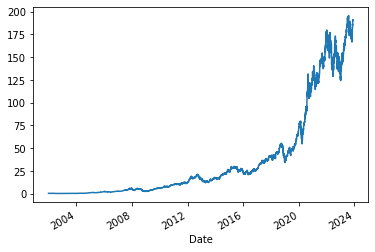

In [5]:
data['Adj Close'].plot()
plt.show()

### Calculate the all-time-high (ATH) and the difference between the current price and ATH

In [6]:
data["ATH"] = data["High"].cummax()

In [7]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,ATH
Date,,,,,,,
2002-01-02,0.393750,0.416071,0.392143,0.416071,0.352695,529496800,0.416071
2002-01-03,0.410714,0.424107,0.406607,0.421071,0.356933,612007200,0.424107
2002-01-04,0.416786,0.427679,0.410536,0.423036,0.358599,409976000,0.427679
2002-01-07,0.423571,0.428571,0.406250,0.408929,0.346641,444584000,0.428571
2002-01-08,0.406250,0.411607,0.401071,0.403750,0.342251,450038400,0.428571


In [8]:
data['PercentageChange'] = ((data['Low'] - data['ATH']) / data['ATH']) * 100

#### Calculate how many times the stock price has decline from the ATH with a certain percentage

In [9]:
data["below_thres"] = data["PercentageChange"] <= -10

In [10]:
data["below_thres"].diff().eq(True).sum()

246

In [11]:
changing = data[data["below_thres"].diff().eq(True)]

In [12]:
changing[changing["below_thres"] == True] # when the threshold was reached

,Open,High,Low,Close,Adj Close,Volume,ATH,PercentageChange,below_thres
Date,,,,,,,,,
2002-01-09,0.407143,0.409464,0.380000,0.386607,0.327719,327835200,0.428571,-11.333243,True
2002-01-23,0.389286,0.411429,0.385536,0.411071,0.348457,443279200,0.428571,-10.041511,True
2002-02-08,0.435714,0.440000,0.417321,0.429107,0.363745,355331200,0.463929,-10.046365,True
2002-02-19,0.424286,0.426250,0.401429,0.403929,0.342403,390258400,0.463929,-13.471889,True
2002-03-06,0.419286,0.434643,0.409464,0.429821,0.364351,226206400,0.463929,-11.739942,True
2002-03-21,0.426071,0.433929,0.415357,0.433393,0.367378,616352800,0.463929,-10.469706,True
2002-03-25,0.429821,0.430179,0.415000,0.416964,0.353452,262830400,0.463929,-10.546658,True
2002-04-01,0.417500,0.441071,0.415714,0.436786,0.370255,199046400,0.463929,-10.392755,True
2002-04-25,0.420714,0.434643,0.420536,0.430714,0.365108,194202400,0.467321,-10.011319,True


### Strategy 1

Buy in when the stock price declines from the ATH for a certain percentage
Sell out when the stock price increases from the buying price for a certain percentage

In [13]:
initial_balance = 1
balance = initial_balance
shares = 0

# Buy threshold and sell threshold percentages
buy_threshold = -10
sell_threshold = 20

# Flags to keep track of buy and sell decisions
buy_signal = False
sell_signal = False
buy_price = float("inf")

# Iterate through the DataFrame
for index, row in data.iterrows():
    if row['PercentageChange'] <= buy_threshold and not buy_signal:
        # Buy condition
        buy_signal = True
        sell_signal = False
        buy_price = row["ATH"] * (1 + buy_threshold/100)
        shares += balance / buy_price
        balance = 0
        print(f"Buying on {index} at {buy_price}")

    elif row['High'] / buy_price >= (1 + sell_threshold/100) and not sell_signal and shares > 0:
        # Sell condition
        sell_signal = True
        buy_signal = False
        sell_price = buy_price * (1 + sell_threshold/100)
        balance += shares * sell_price
        shares = 0
        print(f"Selling on {index} at {sell_price}")

# If there are remaining shares at the end, sell them at the last available price
if shares > 0:
    balance += shares * data.iloc[-1]['Close']
    print(f"Selling remaining shares on {data.iloc[-1]} at {data.iloc[-1]['Close']}")

# Calculate the final balance
final_balance = balance

initial_high = data.iloc[0]['High']
final_high = data.iloc[-1]['High']
baseline_profit = final_high / initial_high

# Print the result
print(f"Initial Balance: ${initial_balance:.2f}")
print(f"Final Balance: ${final_balance:.2f}")
print(f"Profit/Loss: ${final_balance - initial_balance:.2f}")
print(f"Baseline Profit: ${data.iloc[-1]['High'] / data.iloc[0]['High']:.2f}")

Buying on 2002-01-09 00:00:00 at 0.38571388721466066
Selling on 2002-02-05 00:00:00 at 0.4628566646575928
Buying on 2002-02-08 00:00:00 at 0.41753609776496886
Selling on 2004-03-10 00:00:00 at 0.5010433173179626
Buying on 2004-03-22 00:00:00 at 0.4522499978542328
Selling on 2004-06-08 00:00:00 at 0.5426999974250794
Buying on 2004-07-02 00:00:00 at 0.5494823813438415
Selling on 2004-09-17 00:00:00 at 0.6593788576126098
Buying on 2004-12-03 00:00:00 at 1.1180889129638671
Selling on 2005-01-31 00:00:00 at 1.3417066955566406
Buying on 2005-03-08 00:00:00 at 1.460571277141571
Selling on 2005-09-07 00:00:00 at 1.7526855325698854
Buying on 2005-10-12 00:00:00 at 1.779107415676117
Selling on 2005-11-02 00:00:00 at 2.1349288988113404
Buying on 2006-01-20 00:00:00 at 2.777142691612244
Selling on 2007-01-10 00:00:00 at 3.332571229934693
Buying on 2007-01-22 00:00:00 at 3.1435712814331054
Selling on 2007-05-09 00:00:00 at 3.772285537719726
Buying on 2007-07-31 00:00:00 at 4.786713981628418
Selling

#### Generate the Last ATH, which is the last peak of the stock price

In [14]:
data["LastATH"] = 0
current_lATH = 0

for index, row in data.iterrows():
    if row["ATH"]/row["High"] > 1.2:
        data.at[index, "LastATH"] = row["ATH"]
        current_lATH = row["ATH"]
    else:
        data.at[index, "LastATH"] = current_lATH

### Strategy 2

Buy in when the stock price declines from the ATH for a certain percentage (same as in Strategy 1)
Sell out when the stock price increases from the last ATH for a certain percentage

In [27]:
initial_balance = 1
balance = initial_balance
shares = 0

# Buy threshold and sell threshold percentages
buy_threshold = -2
sell_threshold = 20

# Flags to keep track of buy and sell decisions
buy_signal = False
sell_signal = False
buy_price = float("inf")

# Iterate through the DataFrame
for index, row in data.iterrows():
    if row["LastATH"] == 0:
        continue
    if row['PercentageChange'] <= buy_threshold and not buy_signal:
        # Buy condition
        buy_signal = True
        sell_signal = False
        # Change the line below from ["High"] to ["Low"], you will find sth interesting
        buy_price = row["ATH"] * (1 + buy_threshold/100)
        print(row["High"])
        print(row["ATH"] * (1 + buy_threshold/100))
        print(row["Low"])
        shares += balance / buy_price
        balance = 0
        print(f"Buying on {index} at {buy_price}")

    elif row['High'] / row["LastATH"] >= (1 + sell_threshold/100) and not sell_signal and shares > 0:
        # Sell condition
        sell_signal = True
        buy_signal = False
        sell_price = row["High"]#buy_price * (1 + sell_threshold/100)
        balance += shares * sell_price
        shares = 0
        print(f"Selling on {index} at {sell_price}")

# If there are remaining shares at the end, sell them at the last available price
if shares > 0:
    balance += shares * data.iloc[-1]['Close']
    print(f"Selling remaining shares on {data.iloc[-1]} at {data.iloc[-1]['Close']}")

# Calculate the final balance
final_balance = balance

initial_high = data.iloc[0]['High']
final_high = data.iloc[-1]['High']
baseline_profit = final_high / initial_high

# Print the result
print(f"Initial Balance: ${initial_balance:.2f}")
print(f"Final Balance: ${final_balance:.2f}")
print(f"Profit/Loss: ${final_balance - initial_balance:.2f}")
print(f"Baseline Profit: ${data.iloc[-1]['High'] / data.iloc[0]['High']:.2f}")

0.38749998807907104
0.44395495802164076
0.36446401476860046
Buying on 2002-06-11 00:00:00 at 0.44395495802164076
Selling on 2004-06-16 00:00:00 at 0.5950000286102295
0.6105359792709351
0.5800091803073882
0.5751789808273315
Buying on 2004-06-28 00:00:00 at 0.5800091803073882
Selling on 2004-06-29 00:00:00 at 0.5891069769859314
0.5887500047683716
0.5800091803073882
0.5694640278816223
Buying on 2004-06-30 00:00:00 at 0.5800091803073882
Selling on 2004-07-01 00:00:00 at 0.5799999833106995
0.5567860007286072
0.5800091803073882
0.5308930277824402
Buying on 2004-07-02 00:00:00 at 0.5800091803073882
Selling on 2004-07-06 00:00:00 at 0.56107097864151
0.5600000023841858
0.5800091803073882
0.5380359888076782
Buying on 2004-07-07 00:00:00 at 0.5800091803073882
Selling on 2004-07-15 00:00:00 at 0.6005359888076782
0.5878570079803467
0.5800091803073882
0.5735710263252258
Buying on 2004-07-16 00:00:00 at 0.5800091803073882
Selling on 2004-07-19 00:00:00 at 0.5753570199012756
0.574999988079071
0.580009

Buying on 2012-10-04 00:00:00 at 23.92201681137085
Selling on 2012-10-05 00:00:00 at 23.78571319580078
23.12714385986328
23.92201681137085
22.71821403503418
Buying on 2012-10-08 00:00:00 at 23.92201681137085
Selling on 2012-10-09 00:00:00 at 22.874643325805664
23.03499984741211
23.92201681137085
22.75
Buying on 2012-10-10 00:00:00 at 23.92201681137085
Selling on 2012-10-11 00:00:00 at 23.114286422729492
22.692142486572266
23.92201681137085
22.332143783569336
Buying on 2012-10-12 00:00:00 at 23.92201681137085
Selling on 2012-10-15 00:00:00 at 22.68321418762207
23.225000381469727
23.92201681137085
22.53571319580078
Buying on 2012-10-16 00:00:00 at 23.92201681137085
Selling on 2012-10-17 00:00:00 at 23.313928604125977
22.930713653564453
23.92201681137085
22.5
Buying on 2012-10-18 00:00:00 at 23.92201681137085
Selling on 2012-10-19 00:00:00 at 22.563213348388672
22.692142486572266
23.92201681137085
21.812856674194336
Buying on 2012-10-22 00:00:00 at 23.92201681137085
Selling on 2012-10-23 

Selling remaining shares on Open                191.410004
High                191.520004
Low                 189.740005
Close               190.639999
Adj Close           190.639999
Volume                38082700
ATH                 198.229996
PercentageChange     -4.282899
below_thres              False
LastATH             182.940002
Name: 2023-11-21 00:00:00, dtype: object at 190.63999938964844
Initial Balance: $1.00
Final Balance: $0.07
Profit/Loss: $-0.93
Baseline Profit: $460.31
